In [1]:
import numpy as np
print('numpy version:', np.__version__)


numpy version: 1.23.5


In [2]:
from linear_regression import closed_form

In [3]:
lambda_factor = 0.2

In [4]:
n = 4 # number of observations
d = 5 # number of dimensions
X = np.random.randint(1, 10, size=n*d).reshape(n, d)
X

array([[2, 9, 3, 3, 6],
       [5, 7, 8, 9, 8],
       [8, 5, 5, 9, 1],
       [6, 8, 9, 6, 7]])

In [5]:
X = np.hstack((np.ones(n).reshape(-1, 1), X))
X

array([[1., 2., 9., 3., 3., 6.],
       [1., 5., 7., 8., 9., 8.],
       [1., 8., 5., 5., 9., 1.],
       [1., 6., 8., 9., 6., 7.]])

In [6]:
Y = np.random.randint(1, 10, size=n).reshape(-1, 1)
Y

array([[6],
       [2],
       [4],
       [7]])

In [7]:
X.T @ X

array([[  4.,  21.,  29.,  25.,  27.,  22.],
       [ 21., 129., 141., 140., 159., 102.],
       [ 29., 141., 219., 180., 183., 171.],
       [ 25., 140., 180., 179., 180., 150.],
       [ 27., 159., 183., 180., 207., 141.],
       [ 22., 102., 171., 150., 141., 150.]])

In [8]:
lambda_factor * np.identity(d+1)

array([[0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2]])

In [9]:
z = X.T @ X + lambda_factor * np.identity(d+1)
z

array([[  4.2,  21. ,  29. ,  25. ,  27. ,  22. ],
       [ 21. , 129.2, 141. , 140. , 159. , 102. ],
       [ 29. , 141. , 219.2, 180. , 183. , 171. ],
       [ 25. , 140. , 180. , 179.2, 180. , 150. ],
       [ 27. , 159. , 183. , 180. , 207.2, 141. ],
       [ 22. , 102. , 171. , 150. , 141. , 150.2]])

In [10]:
z_1 = np.linalg.inv(z)
z_1

array([[ 4.93396044e+00, -1.87157610e-01, -4.87900377e-01,
         1.29809351e-01, -1.81770407e-01,  8.79731244e-04],
       [-1.87157610e-01,  1.99146153e+00, -8.33344327e-01,
        -1.36977303e+00, -6.99663801e-01,  1.64852745e+00],
       [-4.87900377e-01, -8.33344327e-01,  4.72605094e-01,
         5.89858151e-01,  2.94876164e-01, -7.66556612e-01],
       [ 1.29809351e-01, -1.36977303e+00,  5.89858151e-01,
         1.05958755e+00,  4.14659224e-01, -1.20778817e+00],
       [-1.81770407e-01, -6.99663801e-01,  2.94876164e-01,
         4.14659224e-01,  3.14409215e-01, -5.43207392e-01],
       [ 8.79731244e-04,  1.64852745e+00, -7.66556612e-01,
        -1.20778817e+00, -5.43207392e-01,  1.47584883e+00]])

In [11]:
z @ z_1

array([[ 1.00000000e+00,  2.66453526e-15, -7.54951657e-15,
        -7.54951657e-15, -4.44089210e-16,  9.76996262e-15],
       [-1.17230444e-14,  1.00000000e+00, -2.17603713e-14,
        -1.82076576e-14,  1.55431223e-14,  1.68753900e-14],
       [ 6.24424557e-15,  4.88498131e-15,  1.00000000e+00,
        -1.08801856e-14,  2.37587727e-14,  1.90958360e-14],
       [-5.05997154e-15, -4.70734562e-14, -1.11022302e-14,
         1.00000000e+00,  3.33066907e-14,  9.76996262e-15],
       [ 9.97357578e-16, -3.68594044e-14, -2.46469511e-14,
         1.99840144e-15,  1.00000000e+00,  5.77315973e-15],
       [-5.57371695e-16, -2.30936615e-14, -1.28235870e-14,
        -1.17153499e-14,  2.53157980e-14,  1.00000000e+00]])

In [12]:
z_1 @ X.T @ Y

array([[ 0.07870306],
       [ 0.69299265],
       [ 0.92481301],
       [ 0.33287719],
       [-0.83819148],
       [-0.38153344]])

In [13]:
closed_form(X, Y, lambda_factor)

array([ 0.07870306,  0.69299265,  0.92481301,  0.33287719, -0.83819148,
       -0.38153344])

In [14]:
X

array([[1., 2., 9., 3., 3., 6.],
       [1., 5., 7., 8., 9., 8.],
       [1., 8., 5., 5., 9., 1.],
       [1., 6., 8., 9., 6., 7.]])

In [15]:
print(X.max()) # max from the whole matrix
print(X.max(axis=0)) # max by columns (for each column)
print(X.max(axis=1)) # max by rows (for each row)

9.0
[1. 8. 9. 9. 9. 8.]
[9. 9. 9. 9.]


In [16]:
cs = X.max(axis=0)
cs

array([1., 8., 9., 9., 9., 8.])

In [17]:
X - cs

array([[ 0., -6.,  0., -6., -6., -2.],
       [ 0., -3., -2., -1.,  0.,  0.],
       [ 0.,  0., -4., -4.,  0., -7.],
       [ 0., -2., -1.,  0., -3., -1.]])

In [18]:
predictions = np.exp(X-cs)
predictions

array([[1.00000000e+00, 2.47875218e-03, 1.00000000e+00, 2.47875218e-03,
        2.47875218e-03, 1.35335283e-01],
       [1.00000000e+00, 4.97870684e-02, 1.35335283e-01, 3.67879441e-01,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.83156389e-02, 1.83156389e-02,
        1.00000000e+00, 9.11881966e-04],
       [1.00000000e+00, 1.35335283e-01, 3.67879441e-01, 1.00000000e+00,
        4.97870684e-02, 3.67879441e-01]])

In [19]:
predictions.sum(axis=0)

array([4.        , 1.1876011 , 1.52153036, 1.38867383, 2.05226582,
       1.50412661])

In [20]:
predictions / predictions.sum(axis=0)

array([[2.50000000e-01, 2.08719255e-03, 6.57233023e-01, 1.78497795e-03,
        1.20781243e-03, 8.99759918e-02],
       [2.50000000e-01, 4.19223830e-02, 8.89468173e-02, 2.64914217e-01,
        4.87266313e-01, 6.64837651e-01],
       [2.50000000e-01, 8.42033572e-01, 1.20376427e-02, 1.31893022e-02,
        4.87266313e-01, 6.06253464e-04],
       [2.50000000e-01, 1.13956852e-01, 2.41782517e-01, 7.20111503e-01,
        2.42595612e-02, 2.44580104e-01]])

In [21]:
(predictions / predictions.sum(axis=0)).sum(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [22]:
X

array([[1., 2., 9., 3., 3., 6.],
       [1., 5., 7., 8., 9., 8.],
       [1., 8., 5., 5., 9., 1.],
       [1., 6., 8., 9., 6., 7.]])

Here I want to find the way to get fast and accurate implementation of checking the condition $y^{(i)} == j$ when applying this condition to calculate the following cost function:  
$$
j(\theta) = -\frac{1}{n}[\sum_{i=1}^n \sum_{j=0}^{k-1}{[[y^{(i)} == j]]\ln{\frac{e^{\theta_j x^{(i)} / \tau}}{\sum_{l=0}^{k-1}{e^{\theta_l x^{(i)} / \tau}}}}}] + \frac{\lambda}{2} \sum_{j=0}^{k-1} \sum_{i=0}^{d-1}{\theta_{ji}^2}
$$

So I have Y vector where $y_i$ is the number of class $y_i$ belongs to., And I need matrix of shape (k, n) with 1s in places where y_i is equal to row number., Number of rows of this matrix should be equal to number of classes possible and number of columns should be equal to number of observations (samples)

In [23]:
Y.reshape(-1,)

array([6, 2, 4, 7])

In [24]:
num_classes = 10 # from 0 to 9
a = np.zeros(shape=(num_classes, len(Y)))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
np.array([1 if Y.reshape(-1,)[j] == i else 0 for i in range(a.shape[0]) for j in range(a.shape[1])]).reshape(num_classes, len(Y))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [26]:
for j in range(len(Y)):
    a[Y.reshape(-1,)[j], j] = 1
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Debugging output of loss function

In [27]:
from softmax import *

In [28]:
X = np.array([[ 1., 25., 59., 55., 92., 69., 93., 18., 53., 27., 22.],
            [ 1., 46., 98., 46., 91., 21., 70., 37., 74.,  6., 46.],
            [ 1., 59., 95., 73., 36.,  1., 96., 48., 53.,  6., 72.],
            [ 1., 42., 56., 37., 46., 46., 69., 86., 85., 28.,  4.],
            [ 1., 81., 21., 45., 56., 77., 88., 10., 74., 83., 74.],
            [ 1., 15., 28., 65., 92., 66., 94., 56., 37., 67., 29.],
            [ 1., 79., 80., 77., 73., 63., 76., 25., 60., 68.,  7.],
            [ 1., 44., 31., 95., 63., 91.,  8., 41., 59., 86., 57.],
            [ 1., 11., 38.,  4., 84.,  8., 66., 19., 67., 33., 74.],
            [ 1., 19., 24., 13., 93., 10., 36., 15., 15., 72., 14.]])
theta = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
temp_parameter = 1.0
lambda_factor = 0.0001

In [29]:
X

array([[ 1., 25., 59., 55., 92., 69., 93., 18., 53., 27., 22.],
       [ 1., 46., 98., 46., 91., 21., 70., 37., 74.,  6., 46.],
       [ 1., 59., 95., 73., 36.,  1., 96., 48., 53.,  6., 72.],
       [ 1., 42., 56., 37., 46., 46., 69., 86., 85., 28.,  4.],
       [ 1., 81., 21., 45., 56., 77., 88., 10., 74., 83., 74.],
       [ 1., 15., 28., 65., 92., 66., 94., 56., 37., 67., 29.],
       [ 1., 79., 80., 77., 73., 63., 76., 25., 60., 68.,  7.],
       [ 1., 44., 31., 95., 63., 91.,  8., 41., 59., 86., 57.],
       [ 1., 11., 38.,  4., 84.,  8., 66., 19., 67., 33., 74.],
       [ 1., 19., 24., 13., 93., 10., 36., 15., 15., 72., 14.]])

Exploring scipy.sparse.coo_matrix

In [30]:
import time
import scipy.sparse as sparse

In [31]:
ITER = 100
K = 10 # number of classes
N = 10000

In [32]:
Y = np.random.randint(0, K, size=N)
Y

array([5, 2, 5, ..., 8, 8, 5])

In [33]:
def naive(indices, k):
    # creates matrix row-by-row of 1 in places corresponding with number in indices (num of rows=N (num of observations)) => shape(num-of-observations, num-of-classes)
    mat = [[1 if i == j else 0 for j in range(k)] for i in indices]

    # return matrix is shape (num-of-classes, num-of-observations)
    return np.array(mat).T

Info from [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html)  
coo_matrix( (data, (i, j)), [shape=(M, N)] )  
To construct from three arrays:  
- data[:] the entries of the matrix, in any order  
- i[:] the row indices of the matrix entries
- j[:] the column indices of the matrix entries
  
Where A[i[k], j[k]] = data[k]. When shape is not specified, it is inferred from the index arrays

In [34]:
# function using sparse matrixes
def with_sparse(indices, k):
    n = len(indices) # => number of columns
    # [1]*n - data
    # Y -> row indices for data
    # range(n) -> column indices for data
    M = sparse.coo_matrix(([1]*n, (Y, range(n))), shape=(k,n)).toarray()
    return M

In [35]:
naive(Y, K)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
with_sparse(Y, K)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
t0 = time.time()
for i in range(ITER):
    naive(Y, K)
print(time.time() - t0)

2.6380178928375244


In [38]:
t0 = time.time()
for i in range(ITER):
    with_sparse(Y, K)
print(time.time() - t0)

0.25402021408081055


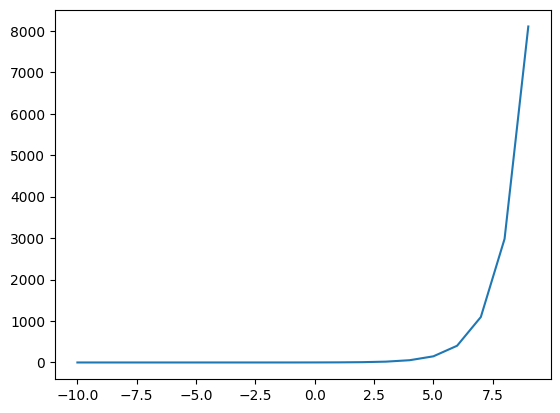

In [39]:
chart_x = np.arange(-10, 10)
chart_y = np.exp(chart_x)

plt.plot(chart_x, chart_y)

In [40]:
chart_y

array([4.53999298e-05, 1.23409804e-04, 3.35462628e-04, 9.11881966e-04,
       2.47875218e-03, 6.73794700e-03, 1.83156389e-02, 4.97870684e-02,
       1.35335283e-01, 3.67879441e-01, 1.00000000e+00, 2.71828183e+00,
       7.38905610e+00, 2.00855369e+01, 5.45981500e+01, 1.48413159e+02,
       4.03428793e+02, 1.09663316e+03, 2.98095799e+03, 8.10308393e+03])

In [44]:
X[:3, :4]

array([[ 1., 25., 59., 55.],
       [ 1., 46., 98., 46.],
       [ 1., 59., 95., 73.]])

In [43]:
X[:3, :4] ** 2

array([[1.000e+00, 6.250e+02, 3.481e+03, 3.025e+03],
       [1.000e+00, 2.116e+03, 9.604e+03, 2.116e+03],
       [1.000e+00, 3.481e+03, 9.025e+03, 5.329e+03]])